# Polynomial Regression

* Non-lineear feauture relationships to label
* Interaction terms between feautures
* interaction term
* PolynomialFeatures which automatically creates both higher order feature polynomials and the interaction tersm betwwen all feature combinations

## Features include:
 * The bias (the value of 1.0)
 * Values raised the power for each degree(x^2,x^3)
 * Interactions between all pairs of features (x1*x2,x1*x3)
 
 
### Converting Two Features A and B
* 1.A,B,A^2,AB,B^2

### Generalized terms feautres X1 and X2
* 1,X1,X',X1^2,X1X2,X2^2

### Example if row was X1=2 and X2=3
* 1,2,3,4,6,9



Polynomial Regression does not require the relationship between the independent and dependent variables to be linear in the data set,This is also one of the main difference between the Linear and Polynomial Regression.Polynomial Regression is generally used when the points in the data are not captured by the Linear Regression Model and the Linear Regression fails in describing the best result clearly.


* 1.Lineer Regression --> y=b0+b1X1
* 2.Multiple Lineer Regression --> y=b0+b1X1+b2X2+bnXn
* 3.Polynomial Regression --> y=b0+b1x1+b2X1^2+bnX1^n

# Creating Polynomial Features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X=df.drop("sales",axis=1)

In [6]:
y=df["sales"]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
polynomial_converter.transform(X).shape

(200, 9)

In [12]:
X.shape

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features=polynomial_converter.transform(X)

In [15]:
poly_features.shape

(200, 9)

In [16]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

* 1- 230.1 
* 2-37.8 
* 3-69.2 
* 4-230.1*37.8 
* 5-230.1*69.2 
* 6-37.8*69.2 
* 7-230.1^2 
* 8-37.8^2 
* 9-69.2^2

In [17]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

# Training and Evaluating Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
test_predictions=model.predict(X_test)

In [24]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
MAE=mean_absolute_error(y_test,test_predictions)

In [27]:
MSE=mean_squared_error(y_test,test_predictions)

In [28]:
RMSE=np.sqrt(MSE)

In [29]:
MAE

0.4896798044803488

In [30]:
RMSE

0.6646431757268974

In [31]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [33]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

# Bias-Variance Trade-Off
## Overfitting versus UnderFitting

* underfitting(high bias)
* overfitting (high variance)

* Overfitting : Model fits too much to the noise from the data.This often results **low error on training sets but high error on test/validation sets**

- overfit on the training data ? --> Thats means we would perform porly on new test data


# Adjusting Model Parameters


* create the different order poly
* split poly feat train/test
* fit on train
* store/save the rmse for BOTH the train and test
* Plot the results(error vs poly order)

In [34]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):

    poly_converter=PolynomialFeatures(degree=d,include_bias=False)

    poly_features=poly_converter.fit_transform(X)

    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

    model=LinearRegression()
    model.fit(X_train,y_train)

    train_predictions=model.predict(X_train)
    test_pred=model.predict(X_test)

    train_rmse=np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [35]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.35170836883993534,
 0.2509342963168562,
 0.20133513038009845,
 5.429519690630219,
 0.20829323347473921,
 0.17705794329531716]

In [36]:
test_rmse_errors

[1.5161519375993884,
 0.6646431757268974,
 0.5803286825163759,
 0.5077742631180222,
 2.575820709711998,
 4.417531343659344,
 1368.3537494947786,
 4031.580690396981,
 99797.38688330933]

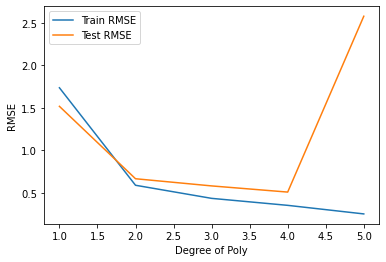

In [37]:
plt.plot(range(1,6),train_rmse_errors[:5],label="Train RMSE")
plt.plot(range(1,6),test_rmse_errors[:5],label="Test RMSE")
plt.xlabel("Degree of Poly")
plt.ylabel("RMSE")
plt.legend()

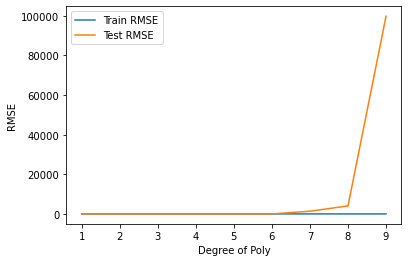

In [38]:
plt.plot(range(1,10),train_rmse_errors,label="Train RMSE")
plt.plot(range(1,10),test_rmse_errors,label="Test RMSE")
plt.xlabel("Degree of Poly")
plt.ylabel("RMSE")
plt.legend()

# Model Deployment

In [39]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [40]:
final_model=LinearRegression()

In [41]:
full_converterted_X=final_poly_converter.fit_transform(X)
final_model.fit(full_converterted_X,y)

LinearRegression()

In [42]:
from joblib import dump,load

In [43]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [44]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [45]:
loaded_converter=load('final_converter.joblib')

In [46]:
loaded_model=load('final_poly_model.joblib')

In [47]:
campaign=[[149,22,12]]

In [48]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [49]:
transformed_data=loaded_converter.fit_transform(campaign)

In [50]:
loaded_model.predict(transformed_data)

array([14.64501014])

 # Regularization

Regularization seeks to solve a few common model issues by:
* Minimizing model complexity
* Penalizing the loss function
* Reducing model overfitting(add more bias yo reduce model variance)

Three main types of Regularization:
* L1 Regularization --> LASSO Regression-absolute value
* L2 Regularization --> Ridge Regression-square
* Combining L1 and L2 --> Elastic Net-ratio

 # Feature Scaling

Feauture scaling benefits:
* Can lead to great increases in performance
* Absolutely necessary for some models
* Virtually no real downside to scaling feautures

Two main ways to scale feautures:
* Standardization -->mean of 0 and std 1 x-mean/std
    * Z-score normalization
* Normalization -->scale between 0-1

Feature scaling process:
* Perform train test split
* Fit to training future data
* Transform training feature data
* Transform test feature data

# Cross Validation

* Split data into K equal parts
* 1/K left as test set
* Train model and get error metric for split 
* Repeat for another 1/K split
* Keep repeating for all possible splits
* Average error is the expected performance

We were able to train on all data and evaluated on all data.




In [51]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
X=df.drop("sales",axis=1)

In [53]:
y=df["sales"]

In [54]:
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)

In [55]:
poly_features=polynomial_converter.fit_transform(X)

In [56]:
poly_features.shape

(200, 19)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

In [58]:
X_train.shape

(140, 19)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [61]:
scaler.fit(X_train)

StandardScaler()

In [62]:
X_train=scaler.transform(X_train)

In [63]:
X_test=scaler.transform(X_test)

In [64]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [65]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])